In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-02-09 12:11:27.620806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
ds=pd.read_excel("AirQualityUCI.xlsx")

In [17]:
ds.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [39]:
ds['Time'] = pd.to_datetime(ds['Time'],format= '%H:%M:%S').dt.hour

In [51]:
ds['Date']=pd.to_datetime(ds['Date'],format='%y-%m-%d')

In [52]:
train_dataset = ds.sample(frac=0.8, random_state=0)
test_dataset = ds.drop(train_dataset.index)

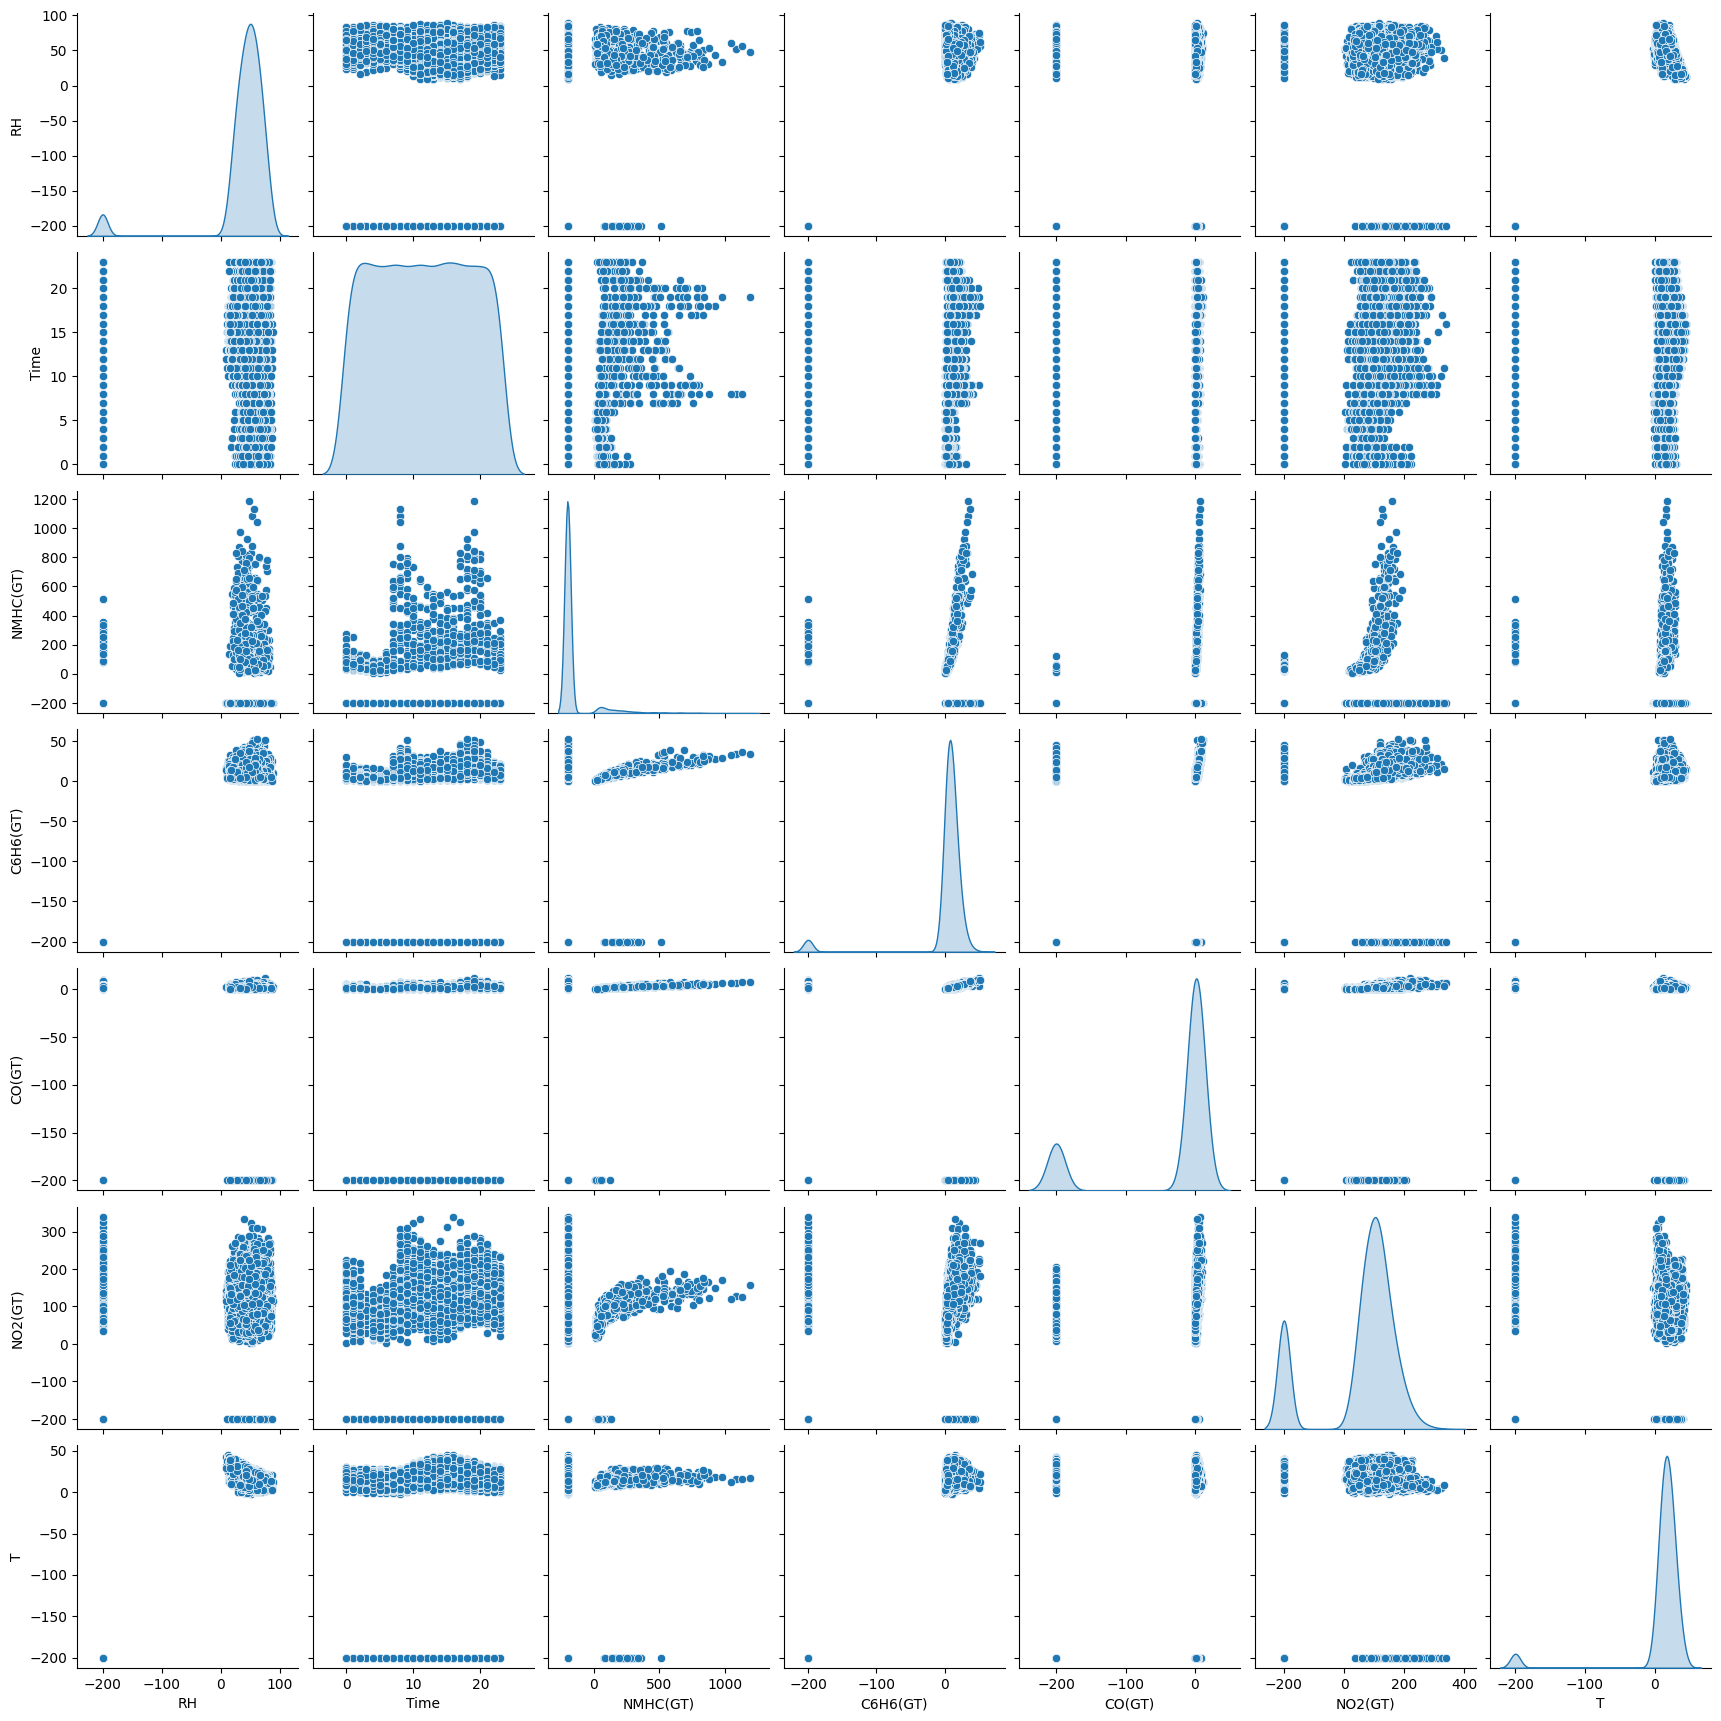

In [53]:
sns.pairplot(train_dataset[['RH', 'Time', 'NMHC(GT)', 'C6H6(GT)','CO(GT)','NO2(GT)','T']], diag_kind='kde')

In [54]:
train_dataset.describe()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000
mean,11.487844,-34.287617,1046.133149,-158.690756,1.717633,891.833111,166.495632,797.434723,57.187390,1388.193906,970.547990,9.702114,39.209884,-6.924072
std,6.934799,77.709461,329.776504,140.800954,41.571093,342.308541,256.082403,324.819566,127.138297,467.731010,456.646734,43.417526,51.397632,39.179677
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,919.312500,-200.000000,3.956504,708.312500,49.000000,639.250000,53.000000,1179.750000,696.750000,10.950000,33.850000,0.689160
50%,11.000000,1.500000,1050.000000,-200.000000,7.838454,892.500000,140.000000,796.500000,96.000000,1444.875000,939.750000,17.225000,48.212500,0.976887
75%,17.000000,2.600000,1217.000000,-200.000000,13.550494,1101.937500,282.000000,961.500000,132.000000,1660.687500,1246.187500,24.125000,61.575000,1.293184
max,23.000000,11.900000,2039.750000,1189.000000,52.054064,2006.750000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [55]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')

In [61]:
train_features.pop('Date')

1121   2004-04-26
8028   2005-02-08
3803   2004-08-16
4595   2004-09-18
587    2004-04-04
          ...    
5122   2004-10-10
4114   2004-08-29
3813   2004-08-16
7964   2005-02-05
6344   2004-11-30
Name: Date, Length: 7486, dtype: datetime64[ns]

In [64]:
test_features.pop('Date')

0      2004-03-10
19     2004-03-11
21     2004-03-11
25     2004-03-11
28     2004-03-11
          ...    
9329   2005-04-03
9331   2005-04-03
9341   2005-04-03
9353   2005-04-04
9354   2005-04-04
Name: Date, Length: 1871, dtype: datetime64[ns]

In [67]:
train_features.pop('AH')
test_features.pop('AH')

0       0.757754
19      0.839268
21      0.877784
25      0.831921
28      0.690484
          ...   
9329    0.567283
9331    0.530155
9341    0.849727
9353    0.711864
9354    0.640649
Name: AH, Length: 1871, dtype: float64

In [68]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [69]:
normalizer.adapt(np.array(train_features))

Neural Network #1

In [136]:
def model_1(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [137]:
dnn_model_1=model_1(normalizer)
dnn_model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 16)                208       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 250
Trainable params: 225
Non-trainable params: 25
_________________________________________________________________


In [138]:
%%time
history = dnn_model_1.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=300)

CPU times: user 42 s, sys: 3.26 s, total: 45.3 s
Wall time: 32.4 s


In [139]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
295,3.795113,3.875701,295
296,3.798617,3.868438,296
297,3.789692,3.856286,297
298,3.785770,3.858786,298
299,3.786170,3.873378,299


In [142]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([3, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)

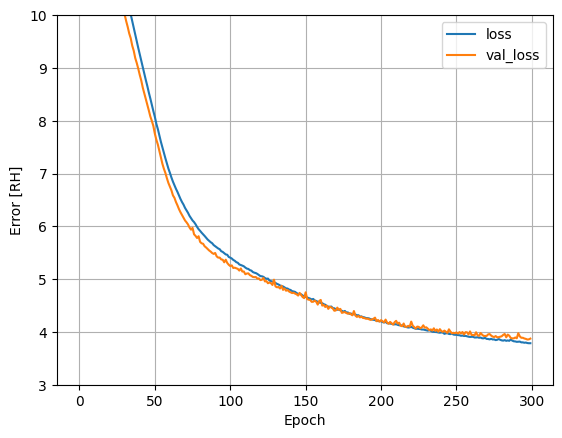

In [143]:
plot_loss(history)

In [146]:
test_results={}
test_results['dnn_model_1'] = dnn_model_1.evaluate(test_features, test_labels, verbose=0)

59/59 [==============================] - 0s 465us/step


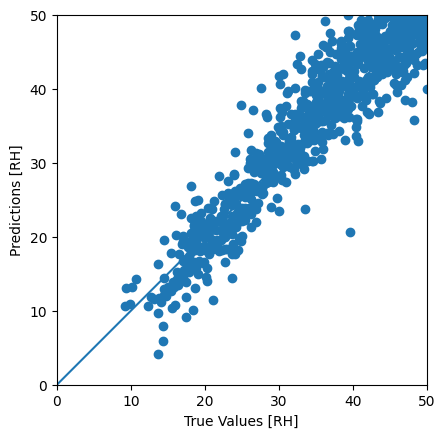

In [147]:
test_predictions = dnn_model_1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Neural Network #2

In [156]:
def model_2(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(16, activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.002))
    return model

In [157]:
dnn_model_2=model_2(normalizer)
dnn_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_21 (Dense)            (None, 16)                208       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 522
Trainable params: 497
Non-trainable params: 25
_________________________________________________________________


In [158]:
%%time
history = dnn_model_2.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 15.1 s, sys: 1.17 s, total: 16.3 s
Wall time: 12 s


In [159]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.300674,3.414210,95
96,3.307397,3.453383,96
97,3.307320,3.543574,97
98,3.295055,3.575174,98
99,3.303667,3.394430,99


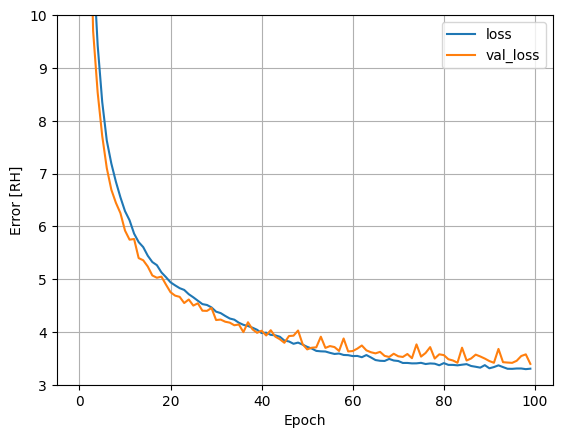

In [160]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([3, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [161]:
test_results['dnn_model_2'] = dnn_model_2.evaluate(test_features, test_labels, verbose=0)

59/59 [==============================] - 0s 599us/step


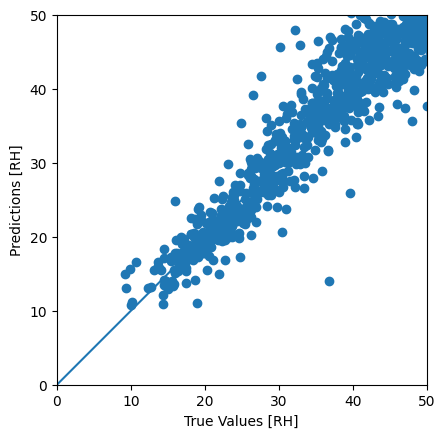

In [162]:
test_predictions = dnn_model_2.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Neural Network #3

In [195]:
def model_3(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(16, activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [196]:
dnn_model_3=model_3(normalizer)
dnn_model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_36 (Dense)            (None, 16)                208       
                                                                 
 dense_37 (Dense)            (None, 64)                1088      
                                                                 
 dense_38 (Dense)            (None, 16)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,378
Trainable params: 2,353
Non-trainable params: 25
__________________________________________________

In [197]:
%%time
history = dnn_model_3.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 18.6 s, sys: 2.49 s, total: 21.1 s
Wall time: 14.2 s


In [198]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.407195,3.412509,95
96,3.370576,3.403888,96
97,3.383960,3.386477,97
98,3.347283,3.483424,98
99,3.332580,3.430089,99


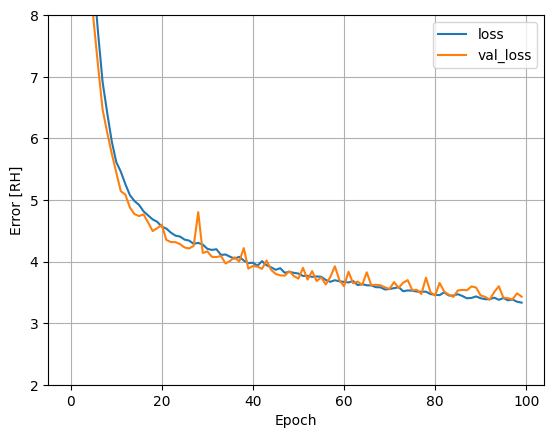

In [200]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([2, 8])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [201]:
test_results['dnn_model_3'] = dnn_model_3.evaluate(test_features, test_labels, verbose=0)

59/59 [==============================] - 0s 552us/step


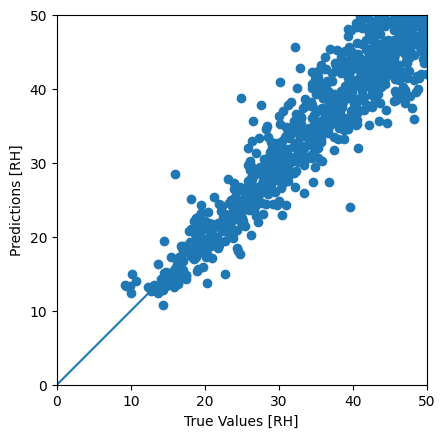

In [202]:
test_predictions = dnn_model_3.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Neural Network #4

In [276]:
def model_4(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(256, activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [277]:
dnn_model_4=model_4(normalizer)
dnn_model_4.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_95 (Dense)            (None, 256)               3328      
                                                                 
 dense_96 (Dense)            (None, 512)               131584    
                                                                 
 dense_97 (Dense)            (None, 512)               262656    
                                                                 
 dense_98 (Dense)            (None, 256)               131328    
                                                                 
 dense_99 (Dense)            (None, 1)                 257       
                                                     

In [278]:
%%time
history = dnn_model_4.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2min 34s, sys: 12.7 s, total: 2min 46s
Wall time: 1min 5s


In [279]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.954185,2.414250,95
96,1.890466,2.625327,96
97,2.138793,2.622442,97
98,1.909665,2.674487,98
99,1.941273,3.169955,99


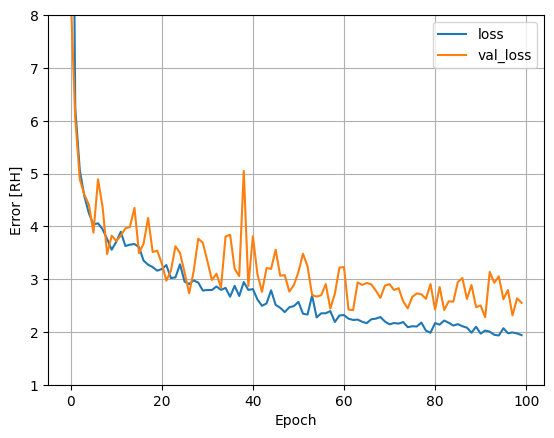

In [291]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([1, 8])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [281]:
test_results['dnn_model_4'] = dnn_model_4.evaluate(test_features, test_labels, verbose=0)

59/59 [==============================] - 0s 1ms/step


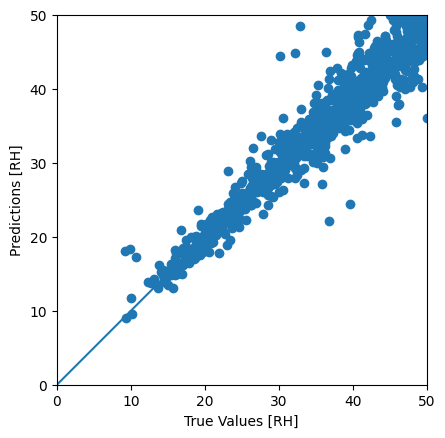

In [282]:
test_predictions = dnn_model_4.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Neural Network #5

In [283]:
def model_5(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(512, activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.0008))
    return model

In [284]:
dnn_model_5=model_5(normalizer)
dnn_model_5.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_100 (Dense)           (None, 512)               6656      
                                                                 
 dense_101 (Dense)           (None, 512)               262656    
                                                                 
 dense_102 (Dense)           (None, 512)               262656    
                                                                 
 dense_103 (Dense)           (None, 512)               262656    
                                                                 
 dense_104 (Dense)           (None, 1)                 513       
                                                     

In [285]:
%%time
history = dnn_model_5.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3min 59s, sys: 19.5 s, total: 4min 19s
Wall time: 1min 43s


In [286]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.070023,2.619674,95
96,1.975132,2.793887,96
97,1.990109,2.312906,97
98,1.971649,2.635906,98
99,1.939945,2.551273,99


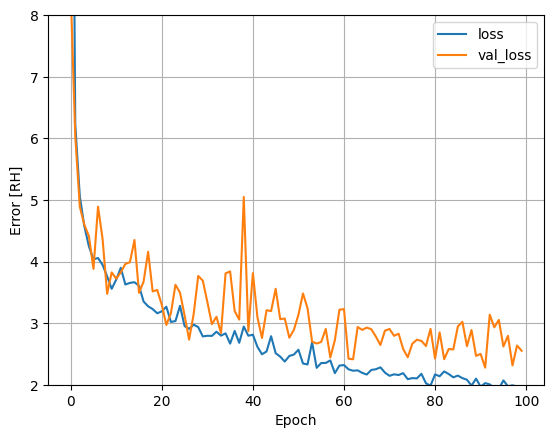

In [287]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([2, 8])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [288]:
test_results['dnn_model_5'] = dnn_model_5.evaluate(test_features, test_labels, verbose=0)

59/59 [==============================] - 0s 2ms/step


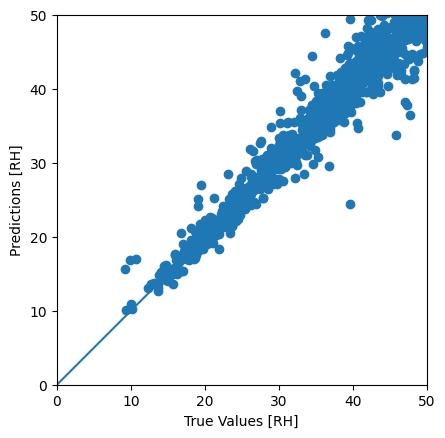

In [289]:
test_predictions = dnn_model_5.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [292]:
# test set errors
print(test_results)

{'dnn_model_1': 3.9229774475097656, 'dnn_model_2': 3.492382287979126, 'dnn_model_3': 3.487075090408325, 'dnn_model_4': 3.246434211730957, 'dnn_model_5': 2.488826274871826}


therefor with the lowest test set error, Neural Network 5 is the best Neural Network